<a href="https://colab.research.google.com/github/MarkusStefan/DeepCNN_SoftAttention/blob/main/model_evaluation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The HAM10000 dataset served as the training set for the ISIC 2018 challenge (Task 3), with the same sources contributing the majority of the validation- and test-set as well. The test-set images are available herein as ISIC2018_Task3_Test_Images.zip (1511 images), the ground-truth in the same format as the HAM10000 data (public since 2023) is available as ISIC2018_Task3_Test_GroundTruth.csv.. The ISIC-Archive also provides the challenge images and metadata (training, validation, test) at their "ISIC Challenge Datasets" page.

https://challenge.isic-archive.com/data/#2018

In [ ]:
!pip install opendatasets
import opendatasets as od
import pandas as pd

# upload your username and api-key
#from kaggle_api_key import kaggle_api_key
#print(kaggle_api_key)

In [ ]:
# upload kaggle.json and the data will automatically be read

od.download("https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000", force=True)

path = "skin-cancer-mnist-ham10000/"

In [ ]:
path = "skin-cancer-mnist-ham10000/"

In [ ]:
meta = pd.read_csv(path + 'HAM10000_metadata.csv')
meta.head()

In [ ]:
# description from ISIC
lesion_types = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_type_short = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

lesion_names_short = ['nv','mel','bkl','bcc','akiec','vasc','df']

meta['lesion_type']=meta['dx'].map(lesion_types)
meta['lesion_type_short'] = meta['dx'].map(lesion_type_short)

print('Total number of images %i' %(len(meta)))

meta['lesion_type'].value_counts()

Total number of images 10015


Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: lesion_type, dtype: int64

In [ ]:
meta

,lesion_id,image_id,dx,dx_type,age,sex,localization,lesion_type,lesion_type_short
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,Actinic keratoses,4
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,Actinic keratoses,4
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,Actinic keratoses,4
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,Actinic keratoses,4


## Data Augmentation

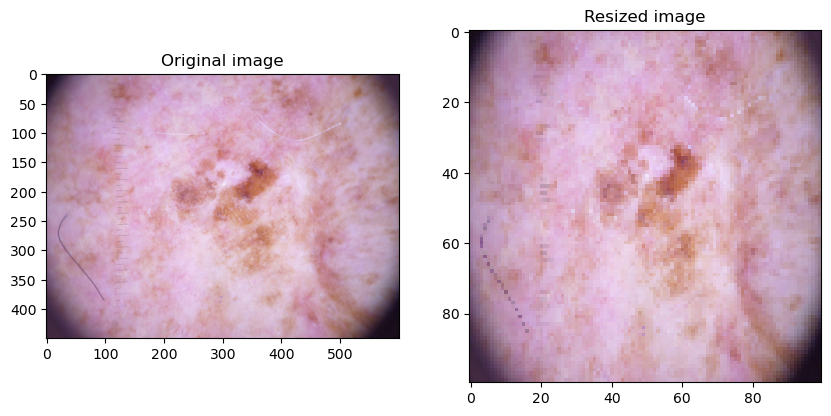

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# retrieve images
images = np.array(meta['image_id'])
HAM_part1 = path + 'HAM10000_images_part_1/' + str(images[1]) + '.jpg'

import cv2
from cv2 import imread, resize

img = imread(HAM_part1)
resized_img = resize(img,(100,100))

# show one exampe image

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(resized_img[:,:,::-1])
plt.title('Resized image')
plt.show()

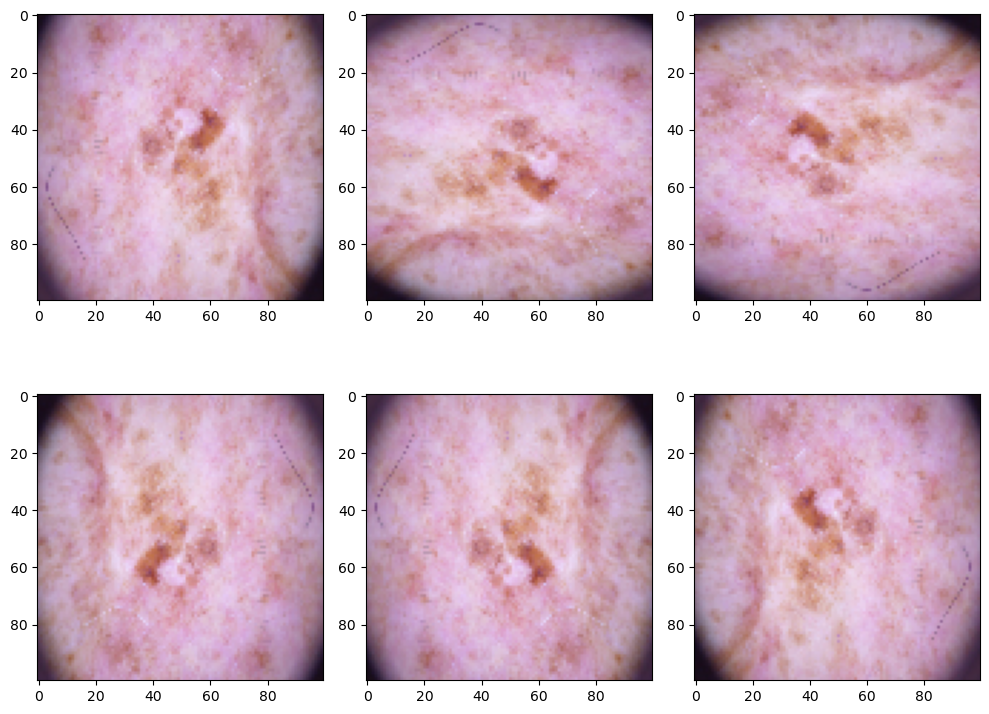

In [ ]:
# augmenting images to reduce class imbalance
# number allows to specify how many augmented versions of the
# original image shall be produced
def augment(image, number:int = 5):
    # produce new images by rotating of flipping the original one
    # this helps to increase the dimension of the dataset, avoiding overfitting of a single class
    if number == 1:
      a = cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
      return a

    if number == 2:
      a = cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
      b = cv2.rotate(image,cv2.ROTATE_90_COUNTERCLOCKWISE)
      return a, b

    if number == 3:
      a = cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
      b = cv2.rotate(image,cv2.ROTATE_90_COUNTERCLOCKWISE)
      c = cv2.rotate(image,cv2.ROTATE_180)
      return a, b, c
    if number == 4:
      a = cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
      b = cv2.rotate(image,cv2.ROTATE_90_COUNTERCLOCKWISE)
      c = cv2.rotate(image,cv2.ROTATE_180)
      d = cv2.flip(img2,0)
      return a, b, c, d
    if number == 5:
      a = cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
      b = cv2.rotate(image,cv2.ROTATE_90_COUNTERCLOCKWISE)
      c = cv2.rotate(image,cv2.ROTATE_180)
      d = cv2.flip(image,0)
      e = cv2.flip(image,1)
      return a, b, c, d, e

    else:
      return None

new_img = augment(resized_img)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
plt.imshow(resized_img[:,:,::-1])
for i in range(5):
    plt.subplot(2,3,2+i)
    plt.imshow(new_img[i][:,:,::-1])
plt.tight_layout()
plt.show()

In [ ]:
import os
# function for importing images from the two folders

def image_importer(path, append=True, X:list=[], y:list=[]):
  dir_list = os.listdir(path)


  if append:
    # allows for adding images to established containers
    pass
  else:
    # initialize empty containers for predictor and target images
    X = []
    y = []

  for i in range(len(dir_list)):
      fname_image = dir_list[i]
      fname_id = fname_image.replace('.jpg','')

      # features|predictors
      folder = path + str(fname_image)
      img = imread(folder)
      resized_img = resize(img,(100, 100))
      X.append(resized_img)

      # targets|predicted
      output = np.array(meta[meta['image_id'] == fname_id].lesion_type_short)
      y.append(output[0])

      # add more images for class between 1-6, by rotation and flipping
      if output != 0:
          new_img = augment(resized_img)
          for i in range(5):
              X.append(new_img[i])
              y.append(output[0])

      # print progress
      if append==False and i % int(100) == 0: # (not append)
         # print(i,'images loaded')
         # "{char_start:filler<right^center>left-ragged[f_loat,d_ecimal, s_tring]}".format(...)
          print("{0:-<7d}".format(i), "images loaded") # d stands for decimal
      elif append and (len(dir_list)+i) % int(100) == 0:
        #print((len(X)+i), "images loaded")
          print("{0:-<7d}".format(len(dir_list)+i), "images loaded")

  return X, y

In [ ]:
part1 = path + 'HAM10000_images_part_1/'
part2 = path + 'HAM10000_images_part_2/'

# importing the images and storing them the feature variable X
X, y = image_importer(part1, append=False)
# appending the second part of HAM10000
X, y = image_importer(part2, append=True, X=X, y=y)

100---- images loaded
300---- images loaded
400---- images loaded
600---- images loaded
700---- images loaded
800---- images loaded
900---- images loaded
1000--- images loaded
1100--- images loaded
1200--- images loaded
1300--- images loaded
1600--- images loaded
1700--- images loaded
1900--- images loaded
2000--- images loaded
2300--- images loaded
2400--- images loaded
2600--- images loaded
2700--- images loaded
2800--- images loaded
2900--- images loaded
3000--- images loaded
3100--- images loaded
3200--- images loaded
3300--- images loaded
3400--- images loaded
3700--- images loaded
3800--- images loaded
4100--- images loaded
4200--- images loaded
4300--- images loaded
4400--- images loaded
4600--- images loaded
4700--- images loaded
4800--- images loaded
4900--- images loaded
5300--- images loaded
5400--- images loaded
5500--- images loaded
6000--- images loaded
6300--- images loaded
6600--- images loaded
6700--- images loaded
6900--- images loaded
7000--- images loaded
7200--- im

In [ ]:
# data shall be comprised of 10_015 * 6 = 60090 images
# X and y are still lists
print(len(X) , len(y))

26565 26565


\begin{array}{|c|c|} \hline
\text{Lesion Type} & \text{Observations} & \text{Augmentation} & \text{Total} \\ \hline
%\text{Total number of images} & 10015 & & \\
\text{Melanocytic nevy} & 6705 & None & 6705  \\
\text{Melanoma} & 1113 & \times 6 & 6678 \\
\text{Benign keratosis-like lesions} & 1099 & \times 6 & 6594 \\
\text{Basal cell carcinoma} & 514 & \times 6 & 3084 \\
\text{Actinic keratoses} & 327 & \times 6 & 1962 \\
\text{Vascular lesions} & 142 & \times 6 & 852 \\
\text{Dermatofibroma} & 115 & \times 6 & 690 \\ \hline
\text{Σ} & 10015  &  & 26565 \\ \hline
\end{array}

In [ ]:
from keras.utils.np_utils import to_categorical

# converting image data to
X = np.array(X)
y = np.array(y)

y_train = to_categorical(y, num_classes=7)

# #convert targets in dummy variables, as required by softmax activation function
# y_dumm = np.array(pd.get_dummies(y))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
# matrix dimensions
print(X.shape)
print(y.shape)

(26565, 100, 100, 3)
(26565,)


X has 4 dimensions:

+ Dimension 1: It has a size of 26565, indicating that X contains 26565 elements along this dimension. This could represent the number of samples or data points in your dataset.

+ Dimension 2: It has a size of 100, meaning that each sample in X has a length or height of 100 units.

+ Dimension 3: It also has a size of 100, indicating that each sample in X has a width of 100 units.

+ Dimension 4: It has a size of 3, suggesting that each element in the X array is a 3-channel image. The three channels typically correspond to the red, green, and blue color channels, which form an RGB image.

+ So, in summary, X is a 4-dimensional array where the first dimension represents the number of samples, and the last three dimensions represent the height, width, and number of channels (in this case, 3 for RGB) of each sample image, respectively.

In [ ]:
from sklearn.model_selection import train_test_split

# split in 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.33, random_state=50, stratify=y)


print('Train dataset shape', X_train.shape)
print('Test dataset shape', X_test.shape)

Train dataset shape (17798, 100, 100, 3)
Test dataset shape (8767, 100, 100, 3)


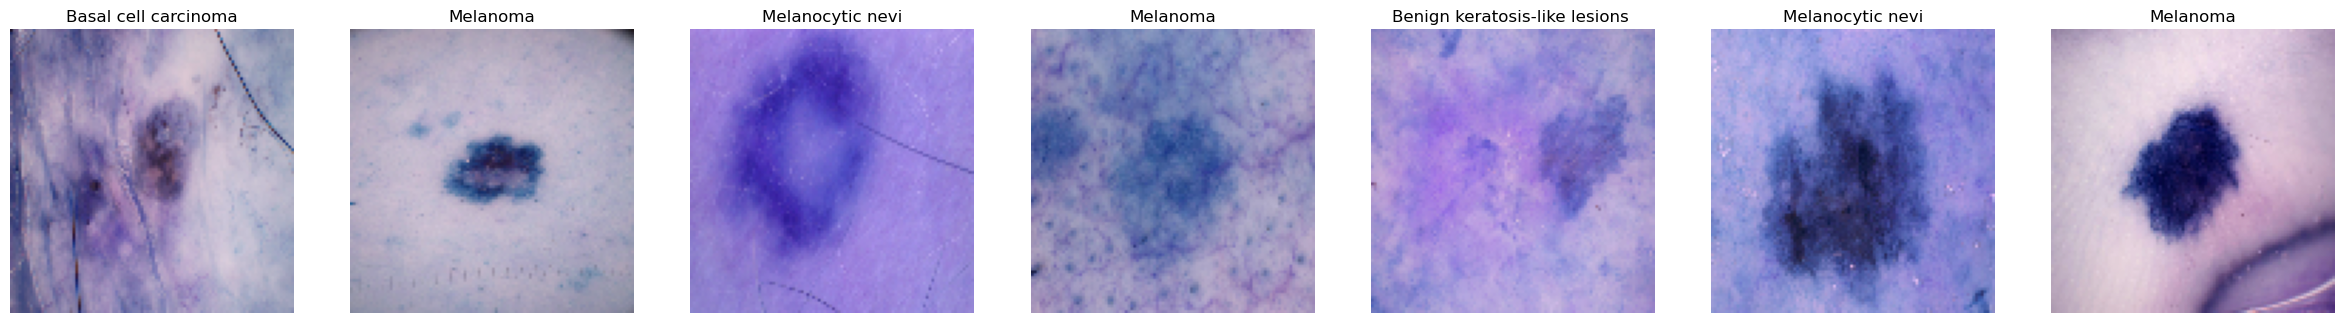

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(30, 30))
for i in range(7):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i]) #, cmap="Accent"
    ax[i].set_title(lesion_names[np.argmax(y_train[i])])

The np.argmax function is a NumPy function that returns the index of the maximum value in an array. In the provided code, np.argmax(y_train[i]) is used to find the index of the maximum value in the i-th element of the y_train array. This index corresponds to the predicted class label for the i-th image in the dataset.

Regarding the blueish color tone in the plots, it is likely because the default colormap used by imshow in matplotlib is 'viridis', which is a colormap that ranges from blue to yellow. This colormap is used to represent the intensity values of the image pixels. However, without the complete code, it is difficult to determine the exact reason for the blueish color tone. It could also be due to specific image processing or normalization applied to the images before plotting.

In [ ]:
meta["lesion_type_short"]

0        2
1        2
2        2
3        2
4        2
        ..
10010    4
10011    4
10012    4
10013    4
10014    1
Name: lesion_type_short, Length: 10015, dtype: int64

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
y_id = np.array(meta["lesion_type_short"])

# compute weights for the loss function, because the problem is unbalanced
class_weights = np.around(compute_class_weight(class_weight='balanced',classes=np.unique(y_id),y=y), 2)
class_weights = dict(zip(np.unique(y_id),class_weights))

print('The problem is unbalanced. We need to provide class_weights ')
print(class_weights)

The problem is unbalanced. We need to provide class_weights 
{0: 0.57, 1: 0.57, 2: 0.58, 3: 1.23, 4: 1.93, 5: 4.45, 6: 5.5}


# The Model

In [ ]:
!wget https://raw.githubusercontent.com/MarkusStefan/DeepCNN_SoftAttention/main/SoftAttention.py

--2023-06-15 19:29:51--  https://raw.githubusercontent.com/MarkusStefan/DeepCNN_SoftAttention/main/SoftAttention.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3387 (3.3K) [text/plain]
Saving to: ‘SoftAttention.py’

SoftAttention.py    100%[===================>]   3.31K  --.-KB/s    in 0s      

2023-06-15 19:29:51 (41.7 MB/s) - ‘SoftAttention.py’ saved [3387/3387]



# Evaluation

## CNN + Soft Attention (CNN_SA)
- first, we need to specify the model architecture
- then we load the trained model's weights
- we do this, because the SoftAttention layer is customized and won't be recognized otherwise

In [ ]:
import keras
from keras.utils import plot_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.layers.core import Dropout, Activation
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Input


input_layer = Input(shape=(100, 100, 3))

deep = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), activation='relu')(input_layer)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(deep)

deep = Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)

deep = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)

deep = Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)

deep = Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
# leafe out max pooling as it will be done in the soft attention layer
#deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)

deep = SoftAttention()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)
deep = Activation("relu")(deep)

deep = Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(1, 1))(deep)


deep = Flatten()(deep)

deep = Dense(4096, activation='relu')(deep)
deep = Dropout(0.5)(deep)

deep = Dense(4096, activation='relu')(deep)
deep = Dropout(0.5)(deep)

output = Dense(7, activation='softmax')(deep)

model = Model(inputs=input_layer, outputs=output)

In [ ]:
# load the model weights establishe during training
from tensorflow.keras import models
model.load_weights("../models/CNN_SA.h5")

274/274 [==============================] - 1s 4ms/step


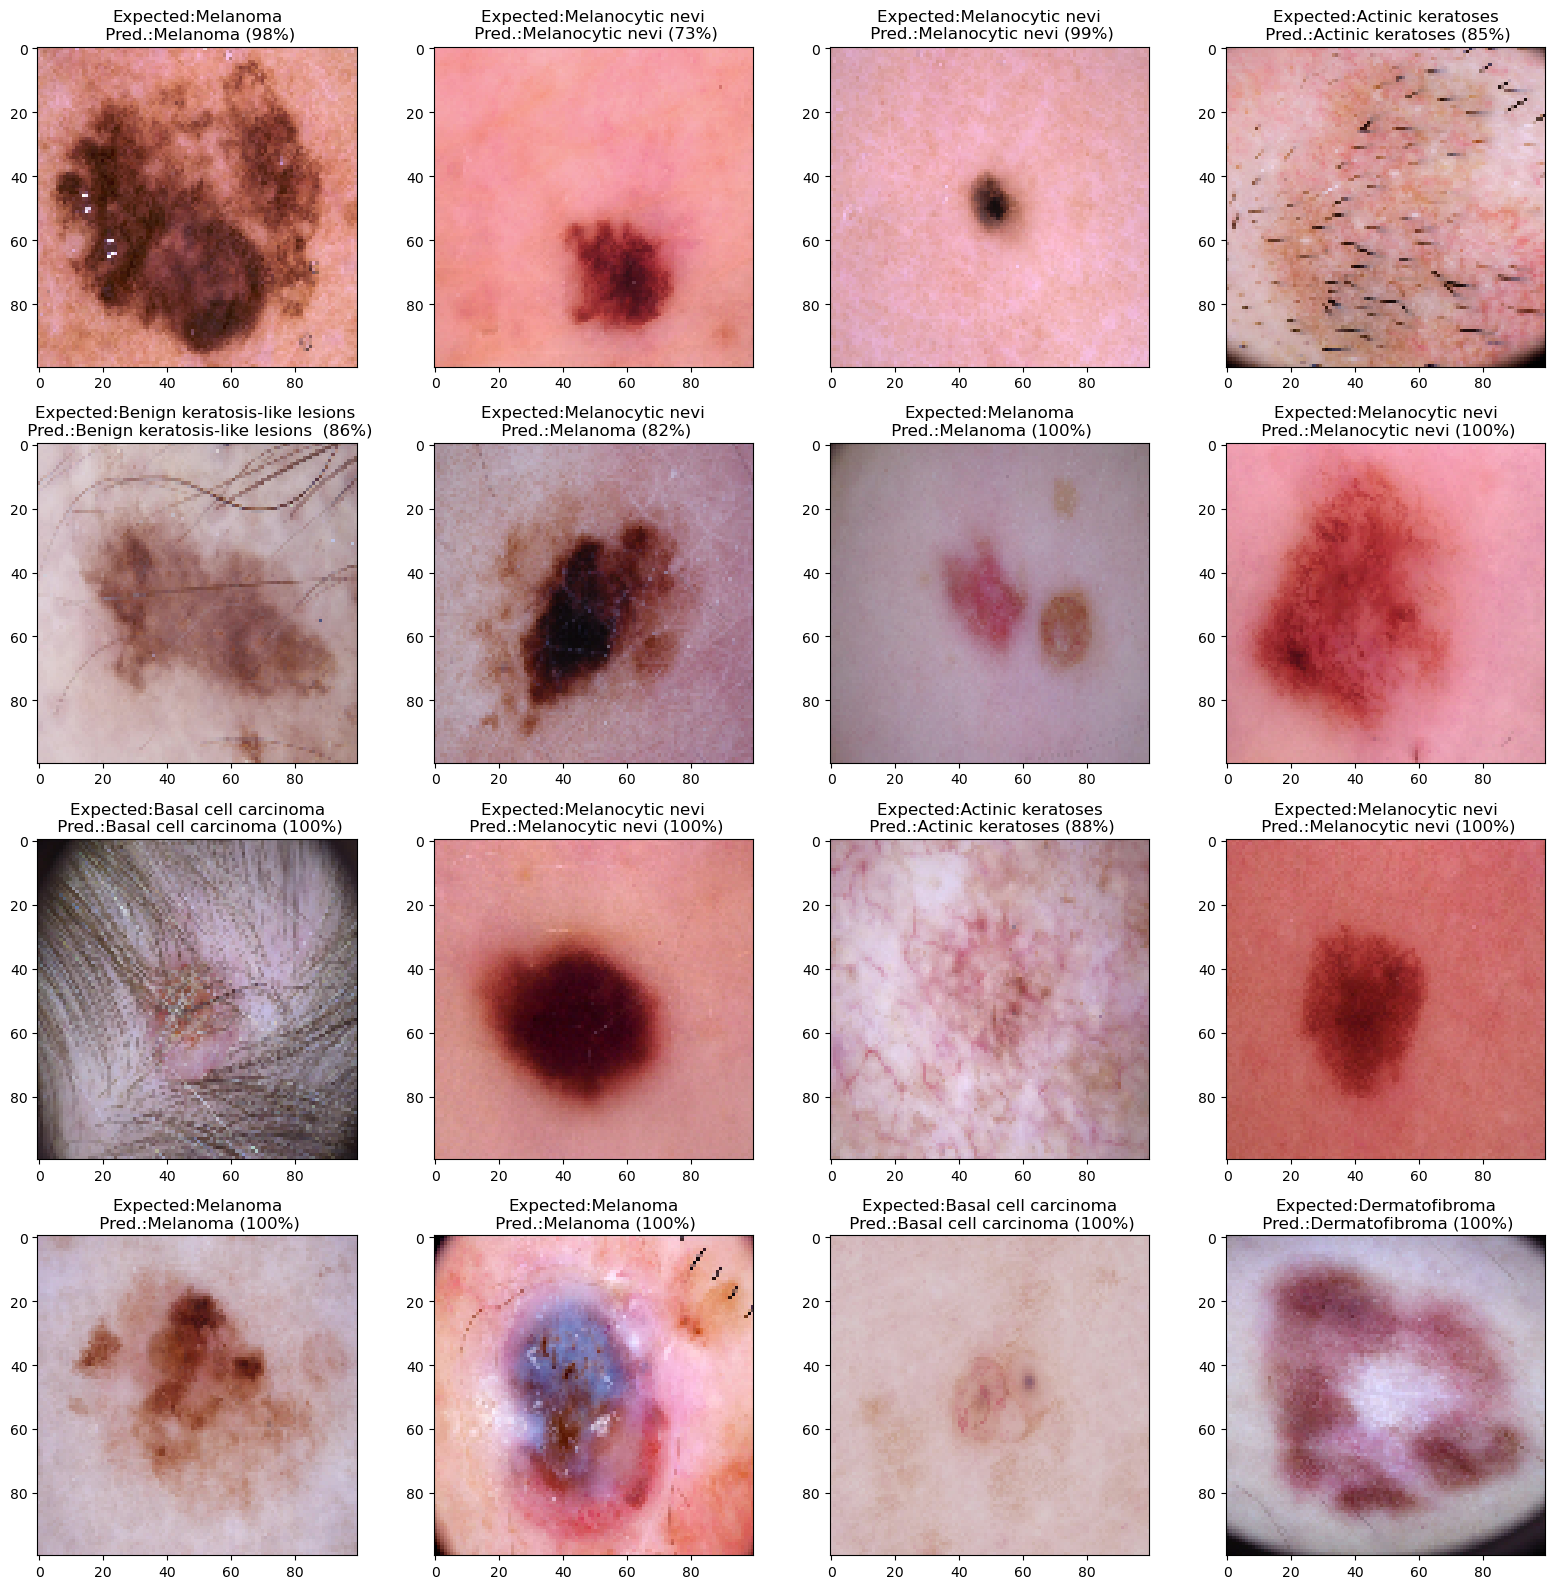

In [ ]:
# compute predictions
# rounding to 3 decimal places
y_pred_prob = np.around(model.predict(X_test),3)

# argmax function to convert posterior probabilities into class predictions
y_pred = np.argmax(y_pred_prob,axis=1)
y_test2 = np.argmax(y_test,axis=1)

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(X_test[index,:,:,::-1])
    label_exp = lesion_names[y_test2[index]]  # expected label
    label_pred = lesion_names[y_pred[index]]  # predicted label
    label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred)+' ('+str(label_pred_prob)+'%)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('final_figure.png',dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info

predictions = model.predict(X_test)

# geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['nv','mel','bkl','bcc','akiec','vasc','df']

# getting the true labels per image
y_true = [lesion_names_short[y_test2[index]] for index in range(len(y_test2))]
y_true = [lesion_type_short[c] for c in y_true]

# getting the predicted labels per image
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# creating classification report
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)

274/274 [==============================] - 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

          nv       0.97      0.79      0.87      2213
         mel       0.86      0.94      0.90      2204
         bkl       0.89      0.93      0.91      2176
         bcc       0.93      0.97      0.95      1018
       akiec       0.89      0.95      0.92       647
        vasc       0.95      1.00      0.97       281
          df       0.93      0.97      0.95       228

    accuracy                           0.91      8767
   macro avg       0.92      0.94      0.92      8767
weighted avg       0.91      0.91      0.91      8767



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='weighted')))

Precision: 0.9100079691185088
Recall: 0.906125242386221
Accuracy: 0.906125242386221
weighted Roc score: 0.9857717834842994


## CNN

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("../models/CNN.h5")

274/274 [==============================] - 1s 3ms/step


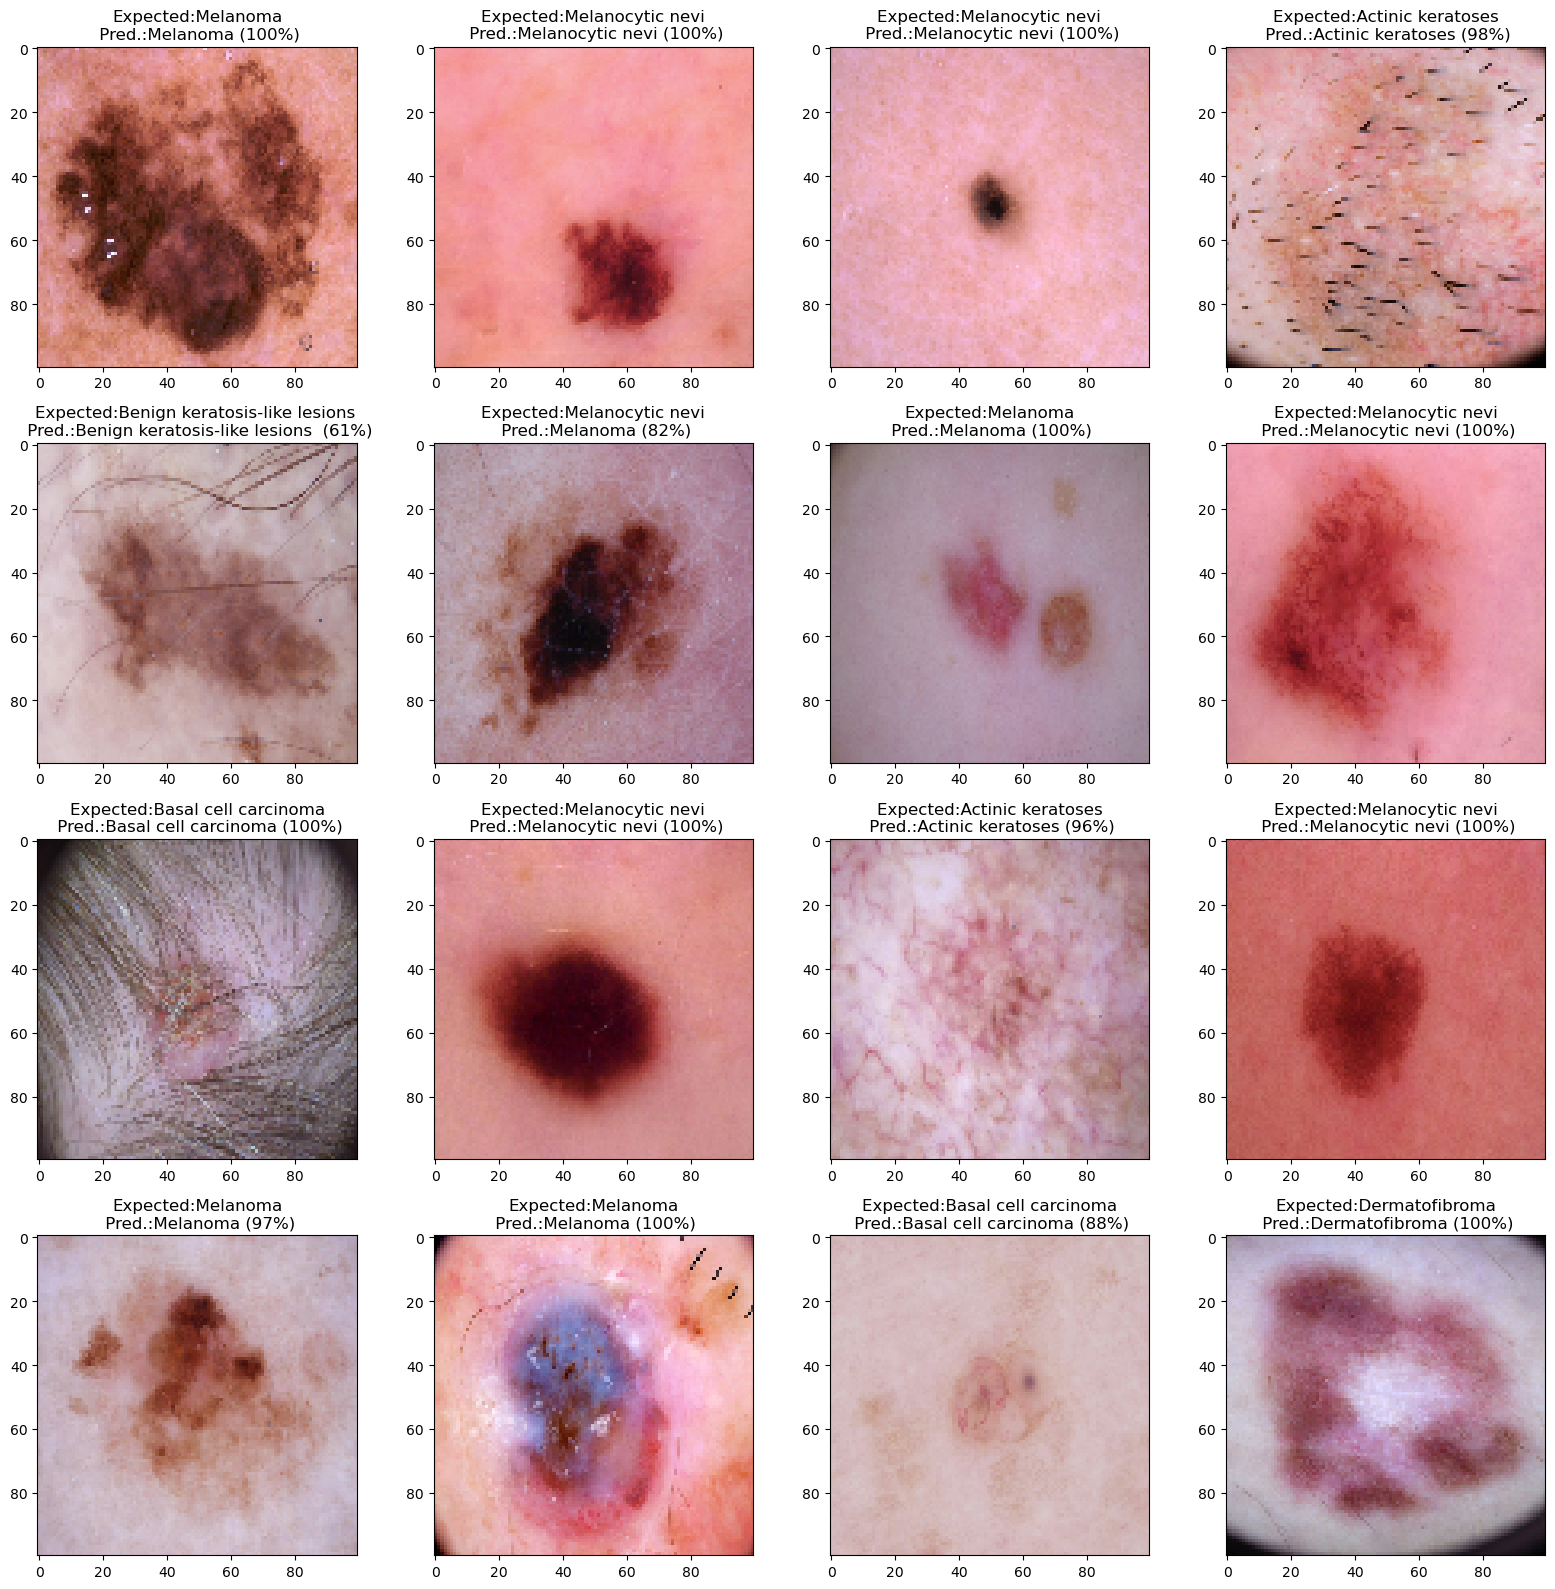

In [ ]:
# compute predictions
y_pred_prob = np.around(model.predict(X_test),3)
y_pred = np.argmax(y_pred_prob,axis=1)

y_test2 = np.argmax(y_test,axis=1)

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(X_test[index,:,:,::-1])
    label_exp = lesion_names[y_test2[index]]  # expected label
    label_pred = lesion_names[y_pred[index]]  # predicted label
    label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred)+' ('+str(label_pred_prob)+'%)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('final_figure.png',dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info

predictions = model.predict(X_test)

#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['nv','mel','bkl','bcc','akiec','vasc','df']

#getting the true labels per image
y_true = [lesion_names_short[y_test2[index]] for index in range(len(y_test2))]
y_true = [lesion_type_short[c] for c in y_true]

#getting the predicted labels per image
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)

274/274 [==============================] - 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

          nv       0.92      0.88      0.90      2213
         mel       0.84      0.96      0.89      2204
         bkl       0.92      0.81      0.86      2176
         bcc       0.95      0.80      0.87      1018
       akiec       0.86      0.87      0.86       647
        vasc       0.97      0.99      0.98       281
          df       0.56      1.00      0.72       228

    accuracy                           0.88      8767
   macro avg       0.86      0.90      0.87      8767
weighted avg       0.89      0.88      0.88      8767



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='weighted')))

Precision: 0.8913906417749432
Recall: 0.880232690772214
Accuracy: 0.880232690772214
weighted Roc score: 0.9861280160477158
